In [1]:
from gensim.models.doc2vec import Doc2Vec, TaggedLineDocument
from nltk.tokenize import word_tokenize
import pandas as pd
import spacy 
nlp = spacy.load("de_core_news_sm")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gzip,os,glob
import numpy as np
import pickle

import nltk
from nltk.corpus import wordnet as wn
from langdetect import detect
from sklearn.manifold import TSNE

<h1> Running the Doc2Vec Model </h1>
https://jlorince.github.io/viz-tutorial/

In [33]:
# # Generate a list of tagged line documents, one per line from the file generated above
# documents = [doc for doc in TaggedLineDocument(r'C:\Users\Johannes\Documents\Projekte\Code\udk_library_local/data_movies_content_after_nltk_doc2vec.csv')]

In [3]:
# Generate a list of tagged line documents, one per line from the file generated above
documents = [doc for doc in TaggedLineDocument(r'C:\Users\Johannes\Documents\Projekte\Code\udk_library_local/data_movies_content_after_nltk_doc2vec_only print.csv')]

In [4]:
# Now just run the model. A simple little one-liner. Be sure to take advantages of the the `workers` option, which parallelizes the model automagically
model = Doc2Vec(documents, vector_size=500, window=5, min_count=5,workers=24)

In [5]:
# the resulting feature vectors are stored in `model.docvecs.doctag_syn0`, 
# so let's just save that numpy array
np.save('../data/features-w2v-200.npy',model.docvecs.doctag_syn0)

# vector normalization for tsne

from sklearn.preprocessing import Normalizer
nrm = Normalizer('l2')
normed = nrm.fit_transform(model.docvecs.doctag_syn0)
np.save('../data/features_normed-w2v-200.npy',normed)


C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if __name__ == '__main__':


In [6]:
np.load('../data/features_normed-w2v-200.npy')

array([[ 0.07001542,  0.07197835,  0.02418528, ..., -0.02501229,
        -0.01262407, -0.06349438],
       [-0.00496443, -0.09272753,  0.01664277, ...,  0.01349732,
        -0.1219142 ,  0.03121593],
       [-0.04474023, -0.10194594,  0.0106135 , ...,  0.01562995,
        -0.0948918 ,  0.01191071],
       ...,
       [-0.03542897,  0.0009387 , -0.03145231, ..., -0.01881445,
         0.03282559, -0.04089152],
       [-0.06155327, -0.11463533, -0.01767405, ..., -0.00321368,
        -0.05864293, -0.01044517],
       [-0.05929213, -0.03282359, -0.01314565, ..., -0.01509519,
         0.02814458, -0.03888825]], dtype=float32)

In [7]:
test_npy = np.load('../data/features_normed-w2v-200.npy')
test_npy.shape

(18141, 500)

In [8]:
# compares similarity of two abstracts through dot product

# validation_vector1 
validation_vector1 = 17312
val_abstract_1 = documents[validation_vector1]
# get validation_vector1
val_vec_1 = normed[validation_vector1,:]

# validation_vector2 
validation_vector2 = 7541
val_abstract_2 = documents[validation_vector2]
# get example vector
val_vec_2 = normed[validation_vector2,:]

# compute similarity
sim = np.dot(val_vec_1,val_vec_2)

print('\nSimilarity:')
print(sim)
print('\nAbstract 1:')
print(' '.join(val_abstract_1[0]))
print('\nAbstract 2:')
print(' '.join(val_abstract_2[0]))


Similarity:
0.88841605

Abstract 1:
17311,"['entscheidung', 'uebergang', 'elektromobilitaet', 'aspekt', 'beitragsautor', 'tagungsbandes', 'wissenschaftsforum', 'mobilitaet', 'mai', 'universitaet', 'duisburgessen', 'entscheidung', 'rahmen', 'automobilmanagement', 'automobiltechnik', 'wertschoepfungskette', 'technologie', 'mobilitaetskonzept', 'bergang', 'elektromobilitaet', 'beitrag', 'bergang', 'elektromobilitaet', 'wissenschaft', 'wirtschaft', 'herausforderung', 'stellen', 'bedarf', 'anstrengung', 'schnittstelle', 'ingenieurwissenschaftlichen', 'forschung']"

Abstract 2:
7540,"['green', 'designed', 'kitchen', 'dining', 'cookery', 'tableware', 'interior', 'green', 'designed', 'kitchen', 'dining', 'stellen', 'produkt', 'bereich', 'kuechendesign', 'bezeichnung', 'styletrends', 'zeit', 'bewusstsein', 'bereich', 'kueche', 'aspekt', 'kueche', 'bilden', 'herzstueck', 'heim', 'buch', 'praesentieren', 'seite', 'kueche', 'ausstattung', 'kuechenzeile', 'material', 'spuelmaschine', 'geschirr', '

In [9]:
# attempt to compute cosine similarity

# choose example 
example = 666
abstract_1 = documents[example]
# get example vector
vec_1 = normed[example,:]

# some DEBUG print statements
#print('vec_1',vec_1.shape)
#print('matirx',normed[example+1:,:].shape)

# compute similarity
sim = np.dot(normed[example+1:,:],vec_1)

# DEBUG
#print('sim',sim.shape)
#print('argmax',np.argmax(sim))

# find most similar document, see paper
abstract_2 = documents[np.argmax(sim)+example+1]

print('\nSimilarity:')
print(np.max(sim))
print('\nAbstract 1:')
print(' '.join(abstract_1[0]))
print('\nAbstract 2:')
print(' '.join(abstract_2[0]))


Similarity:
0.99490976

Abstract 1:
665,"['handbuch', 'energietechnik', 'autor', 'praxisnah', 'form', 'nutzung', 'energietraeger', 'potential', 'beruecksichtigung', 'energieproblem', 'grenze', 'energiewandlungsprozessen', 'beitrag', 'energiesystemdas', 'buch', 'photovoltaik', 'geothermie', 'biomasse', 'wind', 'wasserkraft', 'system', 'elektrizitaet', 'waermebereitstellung', 'kapitel', 'natur', 'ingenieurwissenschaftlichen', 'grundlage', 'funktionsweise', 'komponente', 'verknuepfung', 'system', 'planung', 'auslegungsbeispiel', 'grundlage', 'lehre', 'integration', 'energieanlage', 'system', 'elektrizitaet', 'waerme', 'transport', 'kapitel', 'gewidmetfuer', 'auflage', 'kapitel', 'entwicklung', 'ergaenzen', 'rahmenbedingung', 'datum', 'stand', 'gebrachtder', 'inhalteinleitung', 'kontext', 'energieeffizienz', 'energiequelle', 'photovoltaik', 'solarthermie', 'geothermie', 'biomasse', 'wind', 'wasser', 'energiespeicher', 'energiesystem', 'energiesystem', 'mobilitaet', 'bewertung', 'energieum

In [10]:
for word in model.wv.vocab:
    print(word)
    print(model[word].shape)
    break

'zaehlen',
(500,)


<h1>Step 2: Generate our 2D embedding</h1>
https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [11]:
# Creates TSNE model and plots it
x = []
y = []
z = []

def tsne_plot(model):
    labels = []
    tokens = []

    
    
    tsne_model = TSNE(perplexity=40, n_components=3, init='pca',
                      n_iter=5000, 
                      random_state=23)
    # compute TSNE for word vectors of vocabulary
    #for word in model.wv.vocab:
    #    tokens.append(model[word])
    #    labels.append(word)
    #new_values = tsne_model.fit_transform(tokens)

    new_values = tsne_model.fit_transform(normed)
    
    global x,y,z
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        z.append(value[2])
        
    #plt.figure(figsize=(16, 16)) 
    #for i in range(len(x)):
    #    plt.scatter(x[i],y[i])
        #plt.annotate(labels[i],
         #            xy=(x[i], y[i]),
          #           xytext=(5, 2),
           #          xytext=(5, 2),
            #         textcoords='offset points',
             #        ha='right',
              #       va='bottom')
    #plt.show()


In [12]:
#model.most_similar('auto')

In [13]:
tsne_plot(model)

In [14]:
df_values = pd.DataFrame.from_dict({'x':x,'y':y,'z':z})

In [15]:
print(df_values)

               x          y         z
0      -6.836238  10.730839  9.602785
1     -11.307194   7.588542  9.544738
2     -16.124121  -7.548264  7.501712
3      -9.745749  -1.618167  7.344568
4       0.035806  -8.299883 -7.582017
...          ...        ...       ...
18136  -8.132540  -0.848750 -4.363297
18137   7.823145 -12.151848 -0.534091
18138  12.712759   8.090155  4.305436
18139   3.669363  -6.306347 -5.265491
18140  17.897655   2.729608  4.386311

[18141 rows x 3 columns]


In [16]:
from ast import literal_eval
def read_list(x):
    if type(x) == str:
        return literal_eval(x)
    else:
        return x

df_content = pd.read_csv('../data/dataset_v0.1.csv')
df_content['class'] = df_content['class'].apply(read_list)
df_content.head()

,author,title,class,content,word_count,Languagereveiw
0,NaN,Aernout Mik - Communitas,[Kunstgeschichte],aernout mik zählt zu den wichtigsten künstlern...,64,de
1,NaN,Anton Henning : Dt. /Engl.,NaN,die vorliegende publikation widmet sich drei o...,113,de
2,"Specht, Heike","Die Feuchtwangers : Familie, Tradition und j...","[Sprachwissenschaften, Geschichte]",150 jahre geschichte deutschjüdischen bürgertu...,169,de
3,"Scruton, Roger",Grüne Philosophie : Ein konservativer Denkan...,"[Allgemeines, Philosophie, Theologie und Relig...",der umweltschutz liegt herkömmlich im hoheitsg...,101,de
4,"Schlagowski, Heinz",Technische Dokumentation im Maschinen- und An...,[Technik],das buch gibt dem anwender die entscheidenden ...,156,de


In [17]:
# merge data with computed 2 D Vectors

# drop line corresponding to vector of line containing only "content"
df_values_new = df_values.iloc[1:,:]
df_values_new.reset_index(inplace=True)

# merge data
df = pd.concat([df_content,df_values_new],axis=1)
df.drop(inplace=True, columns=['Languagereveiw','index'])

# save data
df.to_csv('../data/dataset_v1.0.csv')


df.head()

,author,title,class,content,word_count,x,y,z
0,NaN,Aernout Mik - Communitas,[Kunstgeschichte],aernout mik zählt zu den wichtigsten künstlern...,64,-11.307194,7.588542,9.544738
1,NaN,Anton Henning : Dt. /Engl.,NaN,die vorliegende publikation widmet sich drei o...,113,-16.124121,-7.548264,7.501712
2,"Specht, Heike","Die Feuchtwangers : Familie, Tradition und j...","[Sprachwissenschaften, Geschichte]",150 jahre geschichte deutschjüdischen bürgertu...,169,-9.745749,-1.618167,7.344568
3,"Scruton, Roger",Grüne Philosophie : Ein konservativer Denkan...,"[Allgemeines, Philosophie, Theologie und Relig...",der umweltschutz liegt herkömmlich im hoheitsg...,101,0.035806,-8.299883,-7.582017
4,"Schlagowski, Heinz",Technische Dokumentation im Maschinen- und An...,[Technik],das buch gibt dem anwender die entscheidenden ...,156,18.157875,3.410620,4.996137


In [18]:
with open('../data/after_nltk/data_movies_content_after_nltk_xyz.pkl', 'wb') as f:
    pickle.dump(df, f)

,author,title,class,content,word_count,x,y,z,to_visualize,label
0,NaN,Aernout Mik - Communitas,[Kunstgeschichte],aernout mik zählt zu den wichtigsten künstlern...,64,-11.307194,7.588542,9.544738,1,Kunstgeschichte
1,NaN,Anton Henning : Dt. /Engl.,NaN,die vorliegende publikation widmet sich drei o...,113,-16.124121,-7.548264,7.501712,0,
2,"Specht, Heike","Die Feuchtwangers : Familie, Tradition und j...","[Sprachwissenschaften, Geschichte]",150 jahre geschichte deutschjüdischen bürgertu...,169,-9.745749,-1.618167,7.344568,1,Sprachwissenschaften
3,"Scruton, Roger",Grüne Philosophie : Ein konservativer Denkan...,"[Allgemeines, Philosophie, Theologie und Relig...",der umweltschutz liegt herkömmlich im hoheitsg...,101,0.035806,-8.299883,-7.582017,1,Philosophie
4,"Schlagowski, Heinz",Technische Dokumentation im Maschinen- und An...,[Technik],das buch gibt dem anwender die entscheidenden ...,156,18.157875,3.410620,4.996137,1,Technik


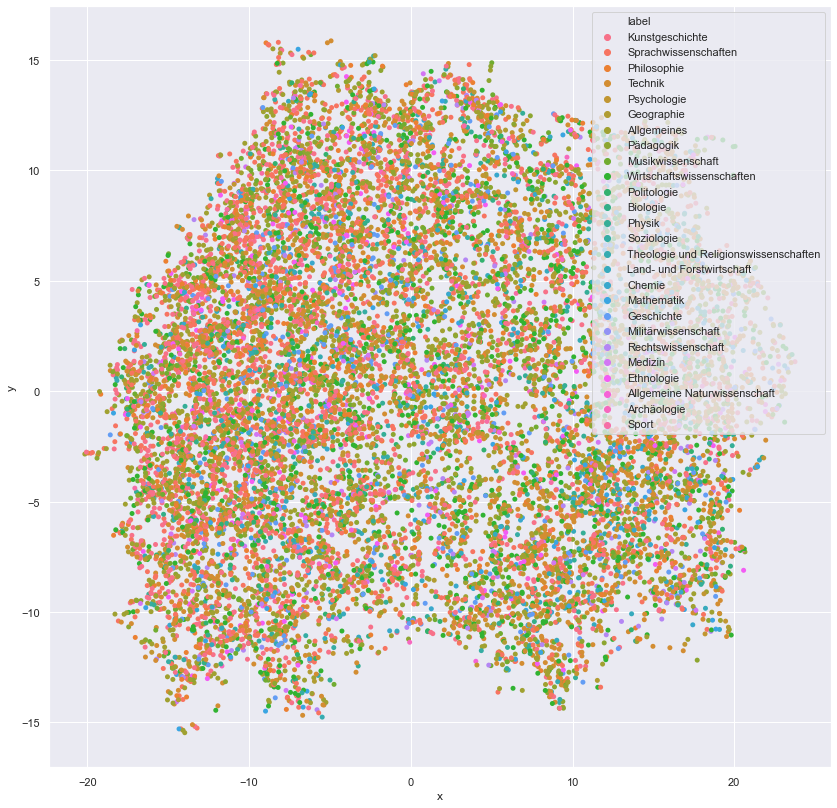

In [19]:
import seaborn as sns
sns.set()

def compare_lists(list_1):
    ''' 
    return 1 if list_1 contains an element mentioned in CATEGORIES
    '''
    global CATEGORIES
    if type(list_1) != list:
        return 0
    for element in list_1:
        if element in CATEGORIES:
            return 1
    return 0

def label(list_1):
    '''
    checks if CATEGORY contains an element contained in list_1
    returns that elment
    no double categories possible
    needs to be improveed
    '''
    global CATEGORIES
    if type(list_1) != list:
        return ''
    for cat in CATEGORIES:
        if cat in list_1:
            return cat
    return ''

def visualize_categories():
    ''' plots data with categores defined in CATEGORIES '''
    df['to_visualize'] = df['class'].apply(compare_lists)
    df['label'] = df['class'].apply(label)
    plt.figure(figsize=(14, 14))
    #plt.style.use('')
    sns.scatterplot(x='x',y='y',hue='label',data=df.loc[df['to_visualize']==1], s=25, linewidth=0)

    
CATEGORIES = ['Sprachwissenschaften', 'Sport', 'Land- und Forstwirtschaft', 'Medizin', 'Allgemeine Naturwissenschaft', 'Geographie', 'Wirtschaftswissenschaften', 'Rechtswissenschaft', 'Militärwissenschaft', 'Gesundheitswissenschaften', 'Archäologie', 'Psychologie', 'Pädagogik', 'Philosophie', 'Theologie und Religionswissenschaften', 'Allgemeines', 'Physik', 'Chemie', 'Biologie', 'Technik', 'Mathematik', 'Informatik''Philologie', 'Ethnologie', 'Kunstgeschichte', 'Musikwissenschaft', 'Politologie', 'Soziologie', 'Geschichte']
visualize_categories()
df.head()

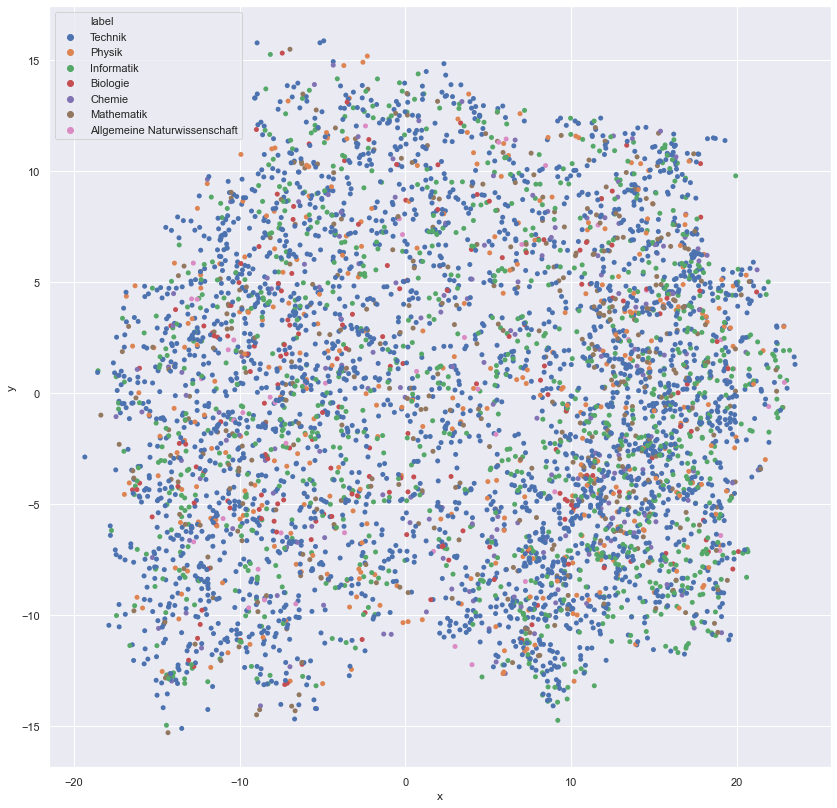

In [20]:
def compare_lists(list_1):
    ''' 
    return 1 if list_1 contains an element mentioned in CATEGORIES
    '''
    global CATEGORIES
    if type(list_1) != list:
        return 0
    for element in list_1:
        if element in CATEGORIES:
            return 1
    return 0

def label(list_1):
    '''
    checks if CATEGORY contains an element contained in list_1
    returns that elment
    no double categories possible
    needs to be improveed
    '''
    global CATEGORIES
    if type(list_1) != list:
        return ''
    for cat in CATEGORIES:
        if cat in list_1:
            return cat
    return ''

def visualize_categories():
    ''' plots data with categores defined in CATEGORIES '''
    df['to_visualize'] = df['class'].apply(compare_lists)
    df['label'] = df['class'].apply(label)
    plt.figure(figsize=(14, 14))
    sns.scatterplot(x='x',y='y',hue='label',data=df.loc[df['to_visualize']==1], linewidth=0, s=25)
    
CATEGORIES = ['Allgemeine Naturwissenschaft', 'Physik', 'Chemie', 'Biologie', 'Technik', 'Mathematik', 'Informatik']
visualize_categories()

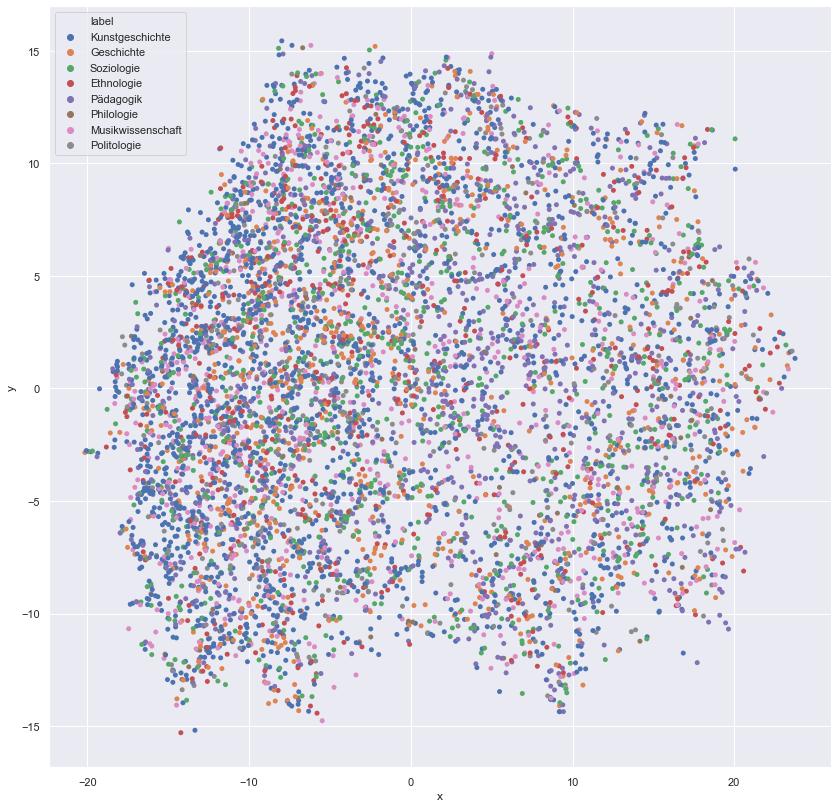

In [21]:
def compare_lists(list_1):
    ''' 
    return 1 if list_1 contains an element mentioned in CATEGORIES
    '''
    global CATEGORIES
    if type(list_1) != list:
        return 0
    for element in list_1:
        if element in CATEGORIES:
            return 1
    return 0

def label(list_1):
    '''
    checks if CATEGORY contains an element contained in list_1
    returns that elment
    no double categories possible
    needs to be improveed
    '''
    global CATEGORIES
    if type(list_1) != list:
        return ''
    for cat in CATEGORIES:
        if cat in list_1:
            return cat
    return ''

def visualize_categories():
    ''' plots data with categores defined in CATEGORIES '''
    df['to_visualize'] = df['class'].apply(compare_lists)
    df['label'] = df['class'].apply(label)
    plt.figure(figsize=(14, 14))
    sns.scatterplot(x='x',y='y',hue='label',data=df.loc[df['to_visualize']==1], linewidth=0, s=25)

    
CATEGORIES = ['Philologie', 'Ethnologie', 'Kunstgeschichte', 'Musikwissenschaft', 'Politologie', 'Soziologie', 'Geschichte', 'Pädagogik']
visualize_categories()

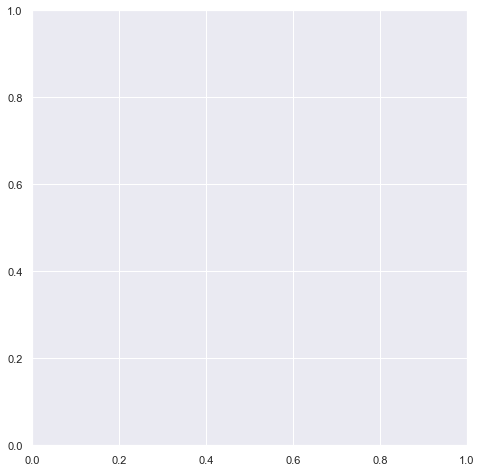

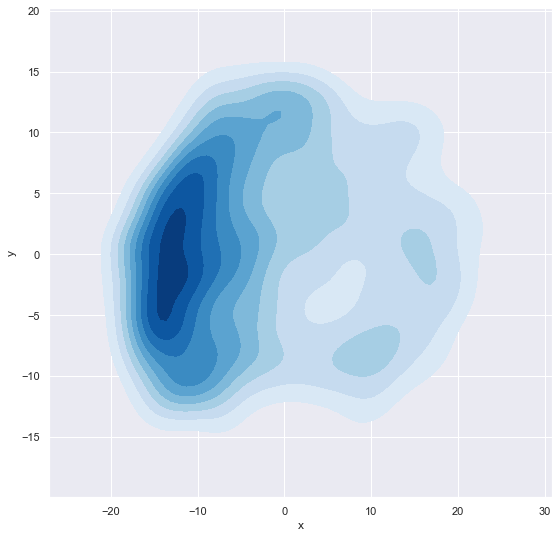

In [22]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# plt.figure(figsize=(9, 9))
# sns.kdeplot(df.loc[df['label']=='Technik'].x,df.loc[df['label']=='Technik'].y,
#                  cmap="Reds", shade=True, shade_lowest=False)
plt.show()
plt.figure(figsize=(9, 9))
sns.kdeplot(df.loc[df['label']=='Kunstgeschichte'].x,df.loc[df['label']=='Kunstgeschichte'].y,
                 cmap="Blues", shade=True, shade_lowest=False)
plt.show()

#red = sns.color_palette("Reds")[-2]
#blue = sns.color_palette("Blues")[-2]
#ax.text(2.5, 8.2, "virginica", size=16, color=blue)
#ax.text(3.8, 4.5, "setosa", size=16, color=red)

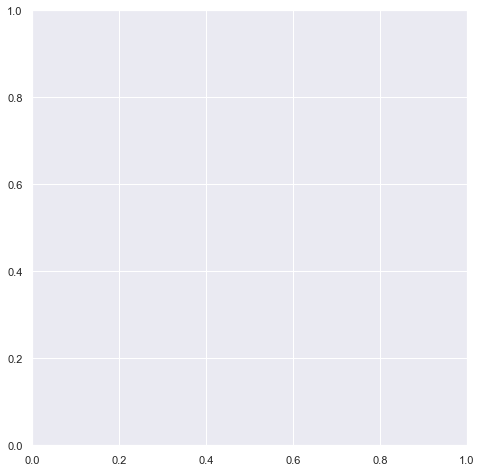

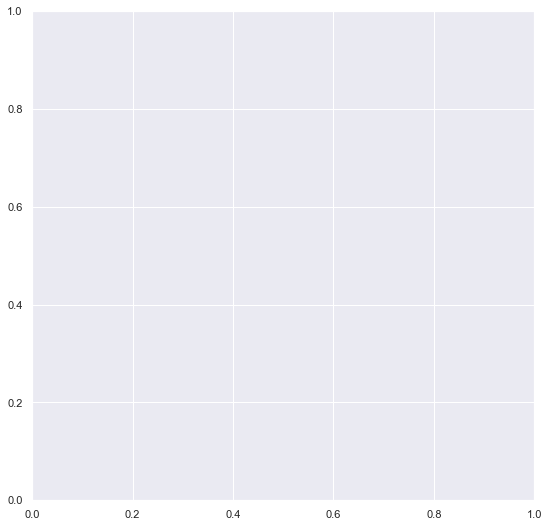

In [23]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# plt.figure(figsize=(9, 9))
# sns.kdeplot(df.loc[df['label']=='Technik'].x,df.loc[df['label']=='Technik'].y,
#                  cmap="Reds", shade=True, shade_lowest=False)
plt.show()
plt.figure(figsize=(9, 9))
sns.kdeplot(df.loc[df['label']=='Technik'].x,df.loc[df['label']=='Technik'].y,
                 cmap="Reds", shade=True, shade_lowest=False)
plt.show()

#red = sns.color_palette("Reds")[-2]
#blue = sns.color_palette("Blues")[-2]
#ax.text(2.5, 8.2, "virginica", size=16, color=blue)
#ax.text(3.8, 4.5, "setosa", size=16, color=red)

In [24]:
df.to_excel('../data/after_nltk/data_for_tableau_testing.xlsx', index = False)
df.to_excel(r'C:\Users\Johannes\Documents\Projekte\Code\udk_library_local/data_for_tableau_testing_doc2vec_only print.xlsx', index = False)
